In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pandas.plotting import lag_plot
import scipy
import scipy.fft


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.rcParams["figure.figsize"] = (20,16)


In [2]:
down = pd.read_csv("l12noschmitt.down")
down
#down = pd.read_csv("l10const.down")
#up = pd.read_csv("l10const.up")

t_down  imm_down  drive_down
0       15869     False       11240
1       13373     False        7801
2       10409     False        6960
3       12125     False        9334
4       22473     False       14082
...       ...       ...         ...
99995    6873     False        5168
99996   25645     False       16975
99997   14335     False        7046
99998   11995     False        8414
99999   16675     False       10604

[100000 rows x 3 columns]

[]

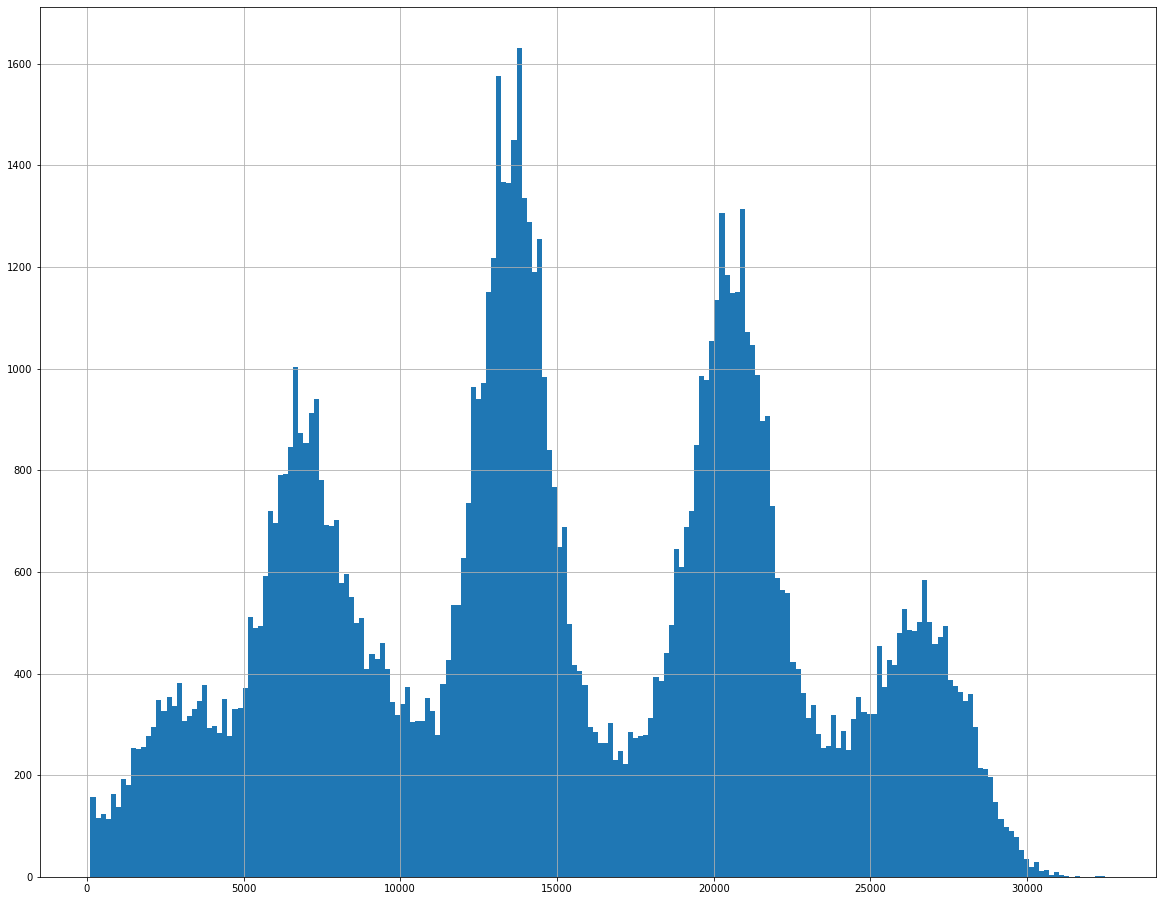

In [3]:
x = down['t_down']
x[x>100].hist(bins=200).plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

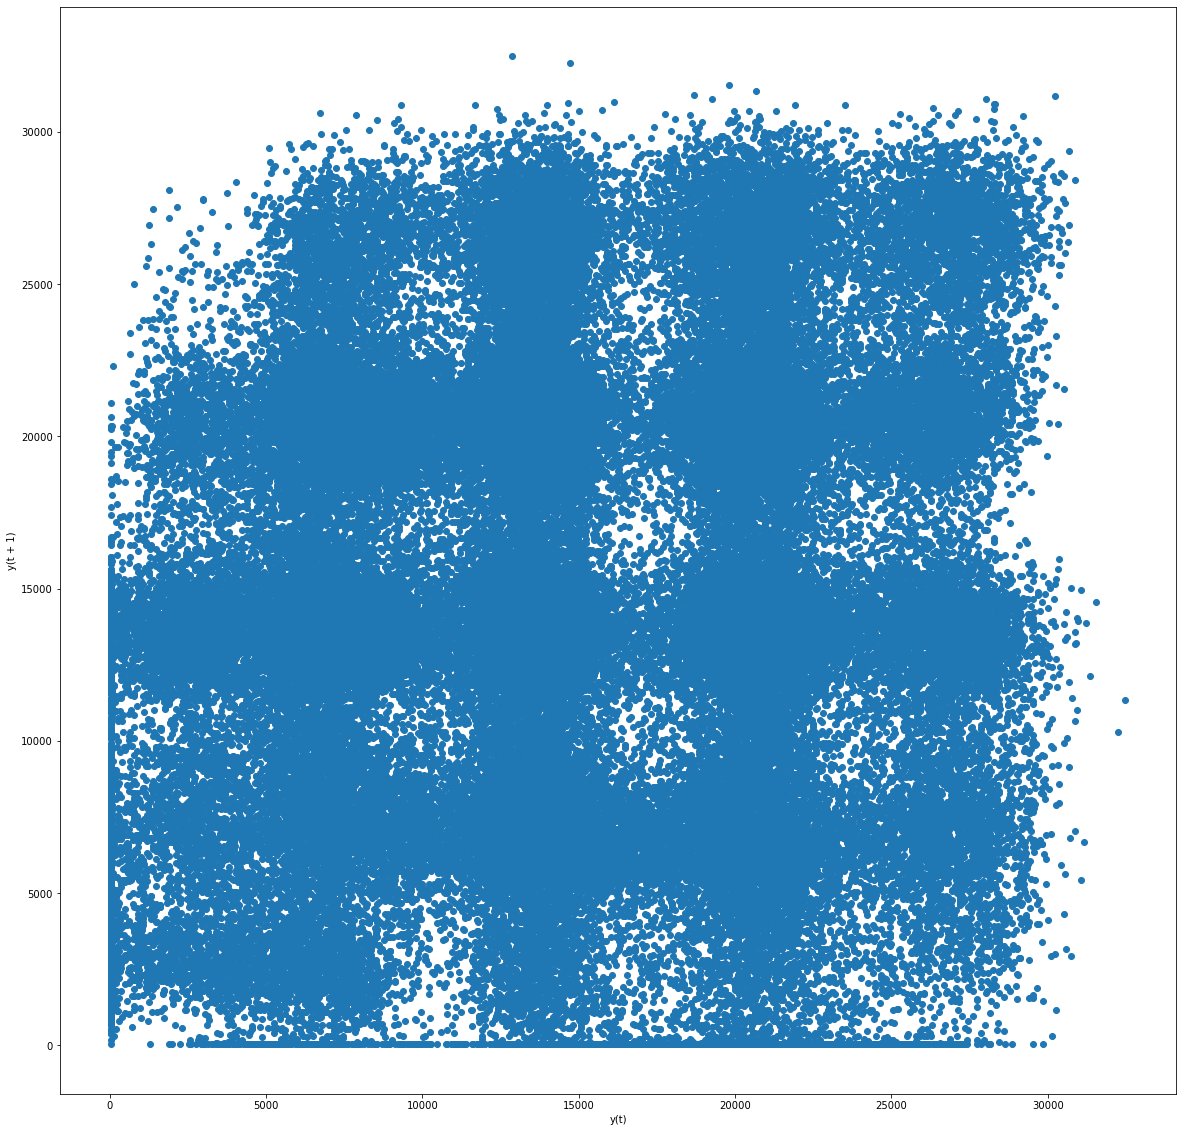

In [4]:
plt.figure(figsize=(20,20))
lag_plot(down['t_down'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

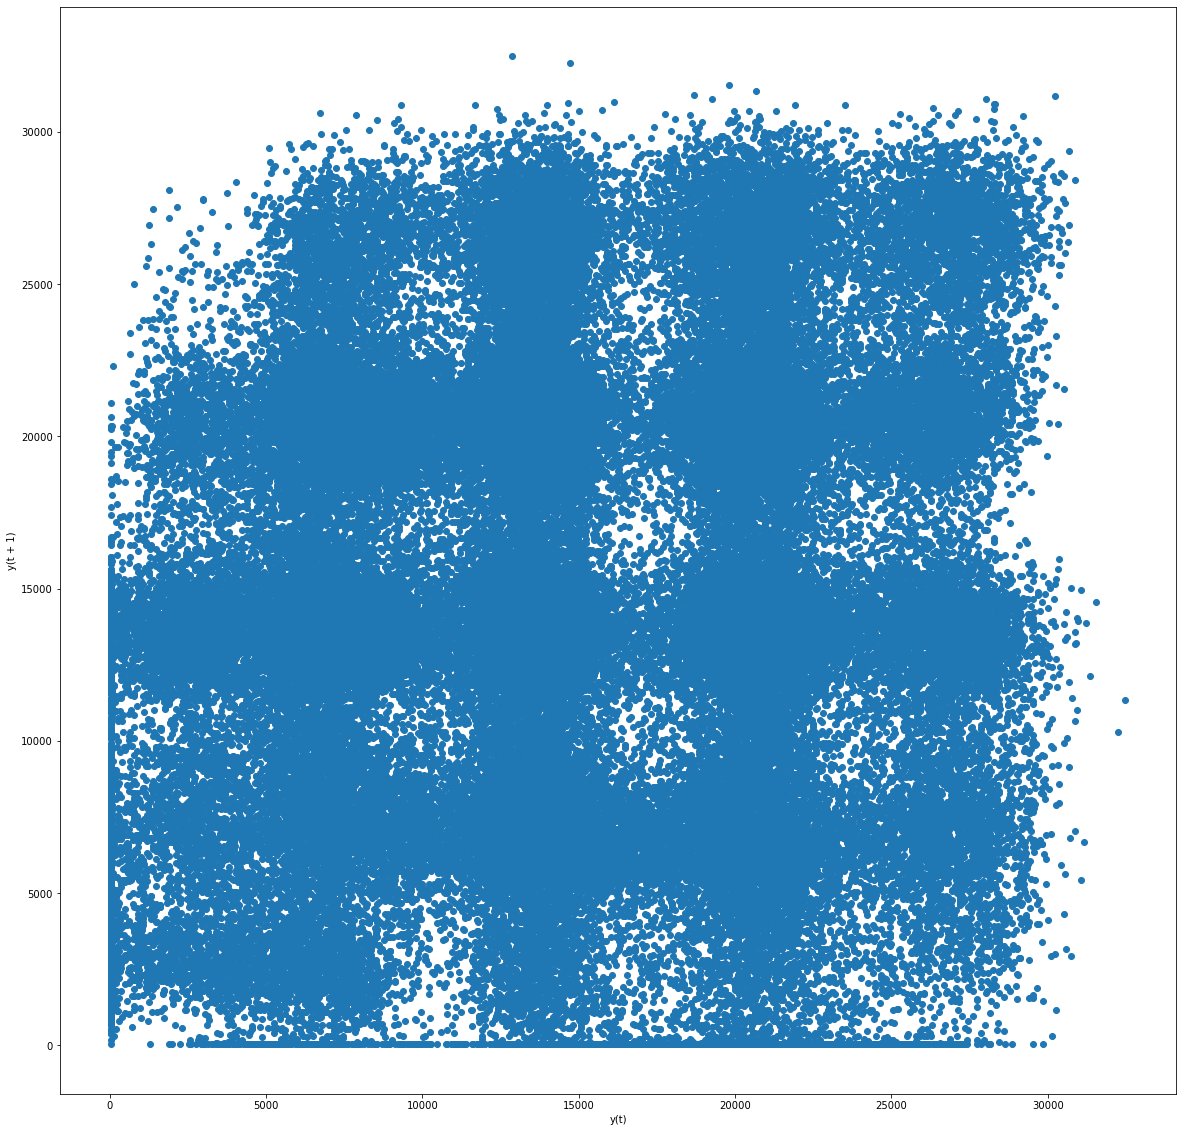

In [5]:
plt.figure(figsize=(20,20))
lag_plot(down['t_down'][::1], lag = 1)


<AxesSubplot:xlabel='drive_down', ylabel='t_down'>

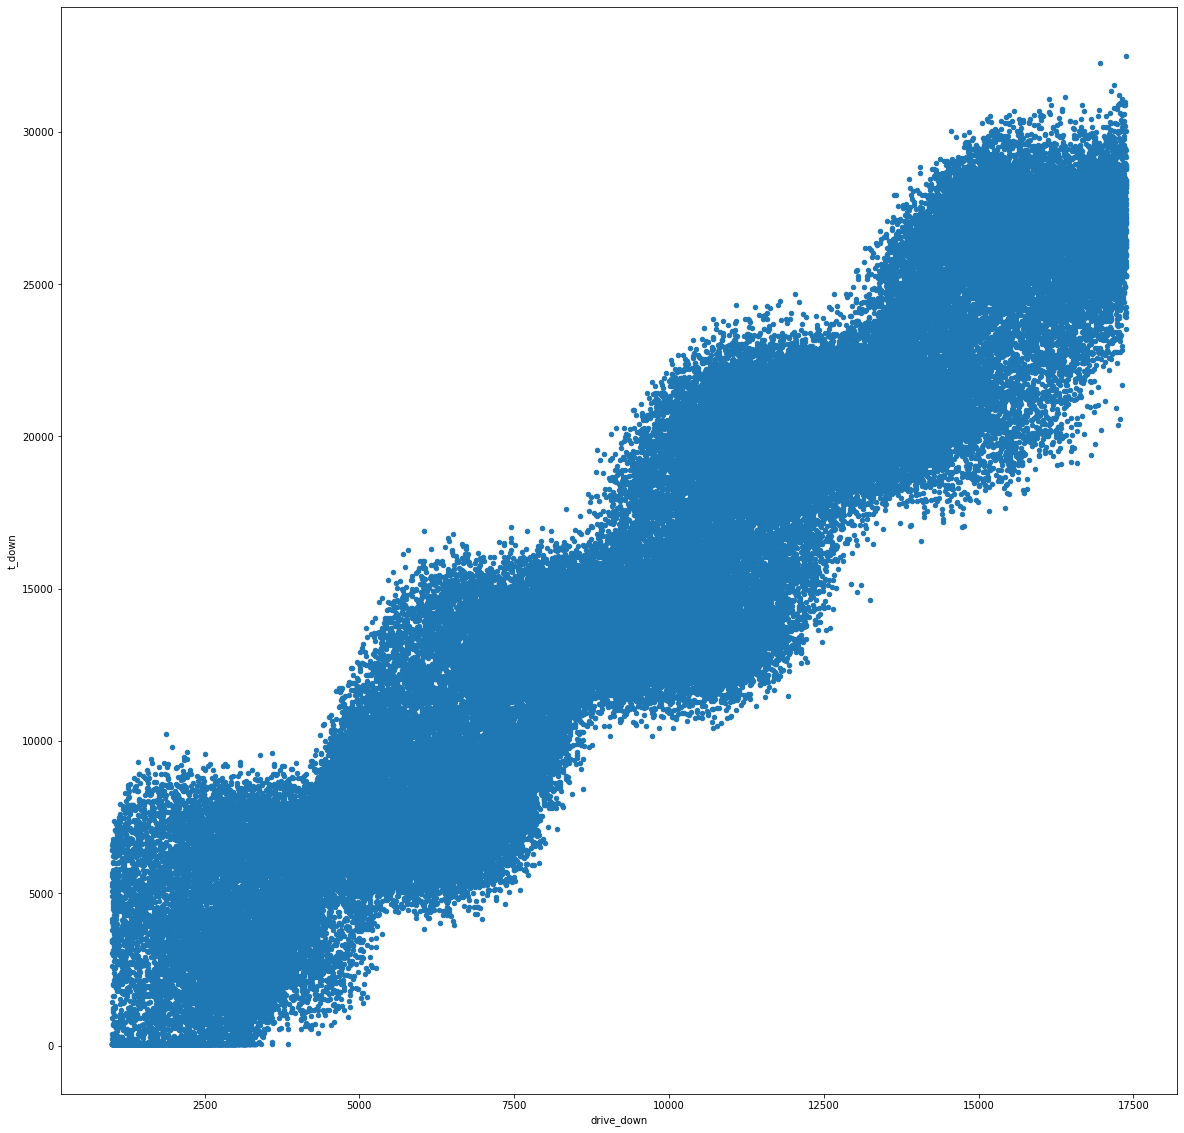

In [6]:

down[['drive_down', 't_down']].plot.scatter('drive_down', 't_down', figsize=(20,20))


<AxesSubplot:xlabel='drive_down', ylabel='t_down_sc'>

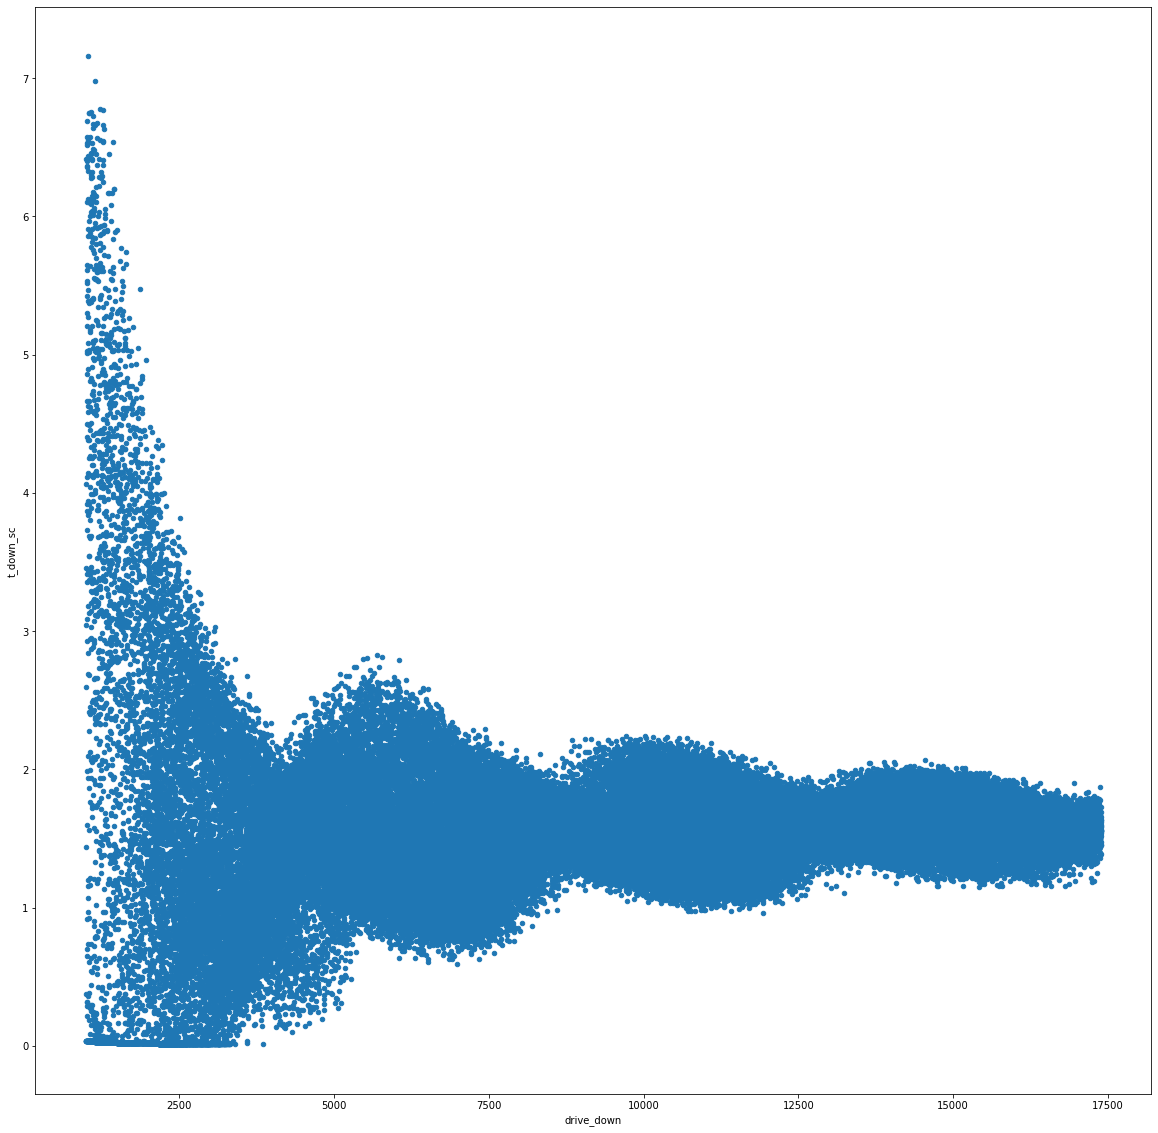

In [7]:
uc = down.copy()
uc['t_down_sc'] = down['t_down'] / down['drive_down']

uc[uc['drive_down'] > 0].plot.scatter('drive_down', 't_down_sc', figsize=(20,20))


<AxesSubplot:xlabel='drive_down', ylabel='t_down_sc'>

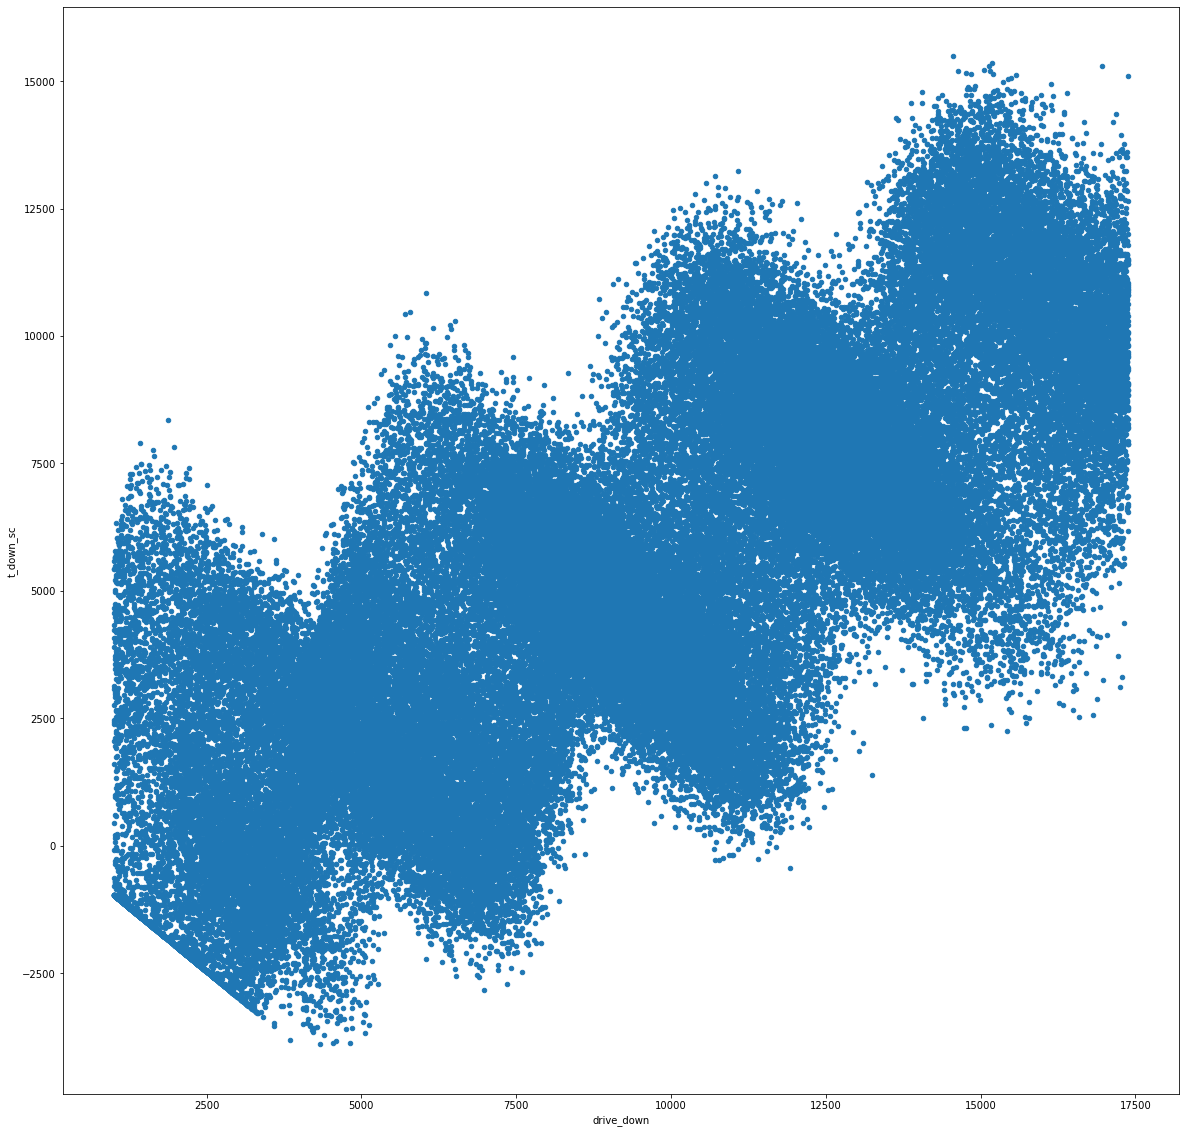

In [8]:
uc = down.copy()
uc['t_down_sc'] = down['t_down'] - down['drive_down']

uc[uc['drive_down'] > 0].plot.scatter('drive_down', 't_down_sc', figsize=(20,20))


<AxesSubplot:xlabel='drive_down', ylabel='t_down'>

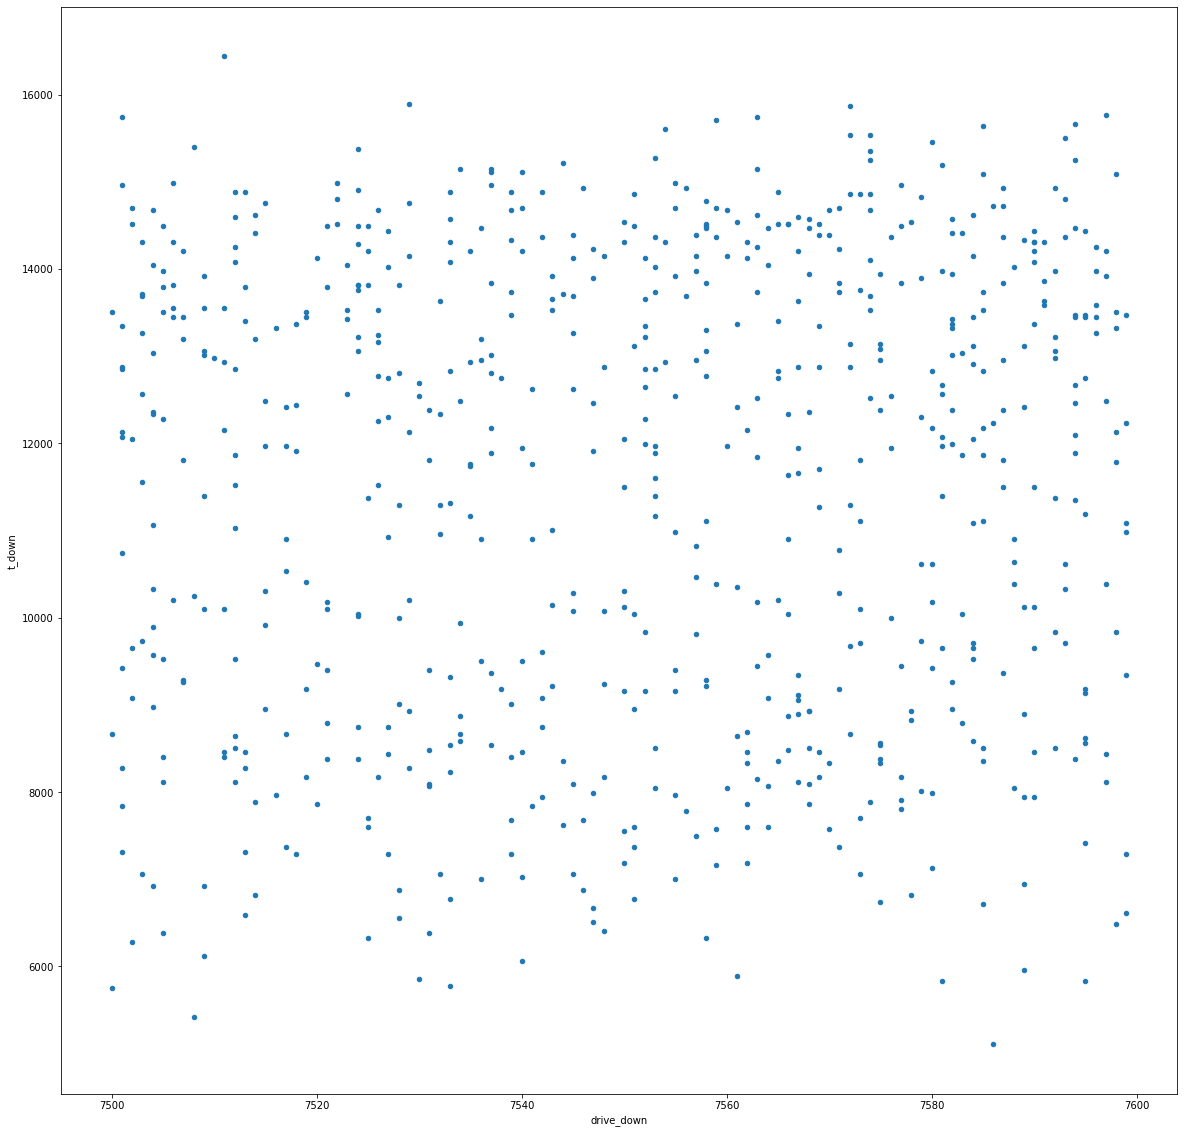

In [9]:
down.query('drive_down >= 7500 and drive_down < 7600').plot.scatter('drive_down', 't_down', figsize=(20,20))


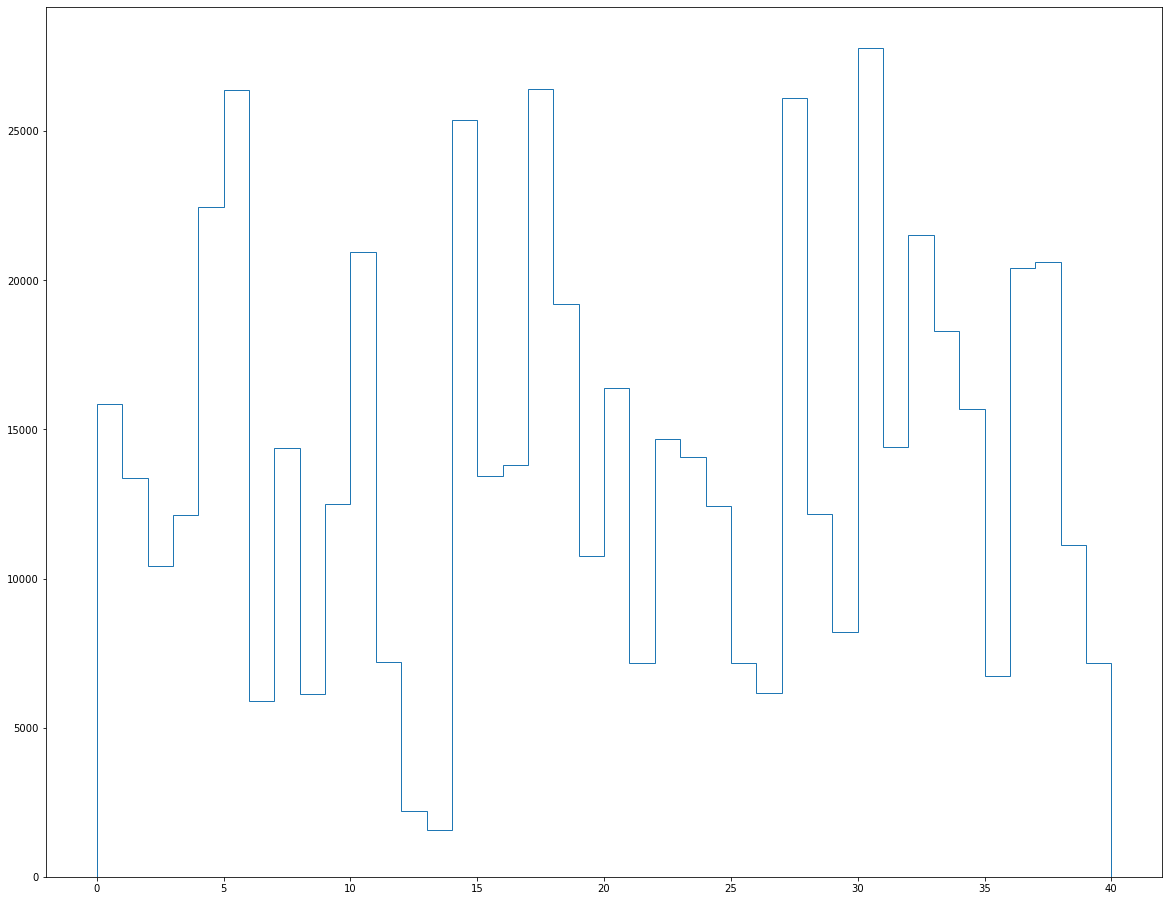

In [10]:
d = down['t_down'][:40]


fig, ax = plt.subplots()
ax.stairs( d)

plt.show()


#.plot(kind = 'step', figsize=(30,16))





In [11]:
def colourplot(data, size = 300):
    nx = size
    ny = size
    nm = data.name
    data = data[:nx*ny].values.reshape(nx, ny)

    plt.xlim(0, nx)
    plt.ylim(0, ny)

    plt.xlabel('samples')
    plt.ylabel('samples')
    plt.title(f'{nm}')

    #cax = plt.imshow(data, interpolation='nearest', cmap=cm.coolwarm)
    cax = plt.imshow(data, interpolation='nearest', cmap=cm.afmhot)
    cbar = plt.colorbar(cax, ticks=[255, 127, 0])
    cbar.ax.set_yticklabels(['255', '127', '0'])

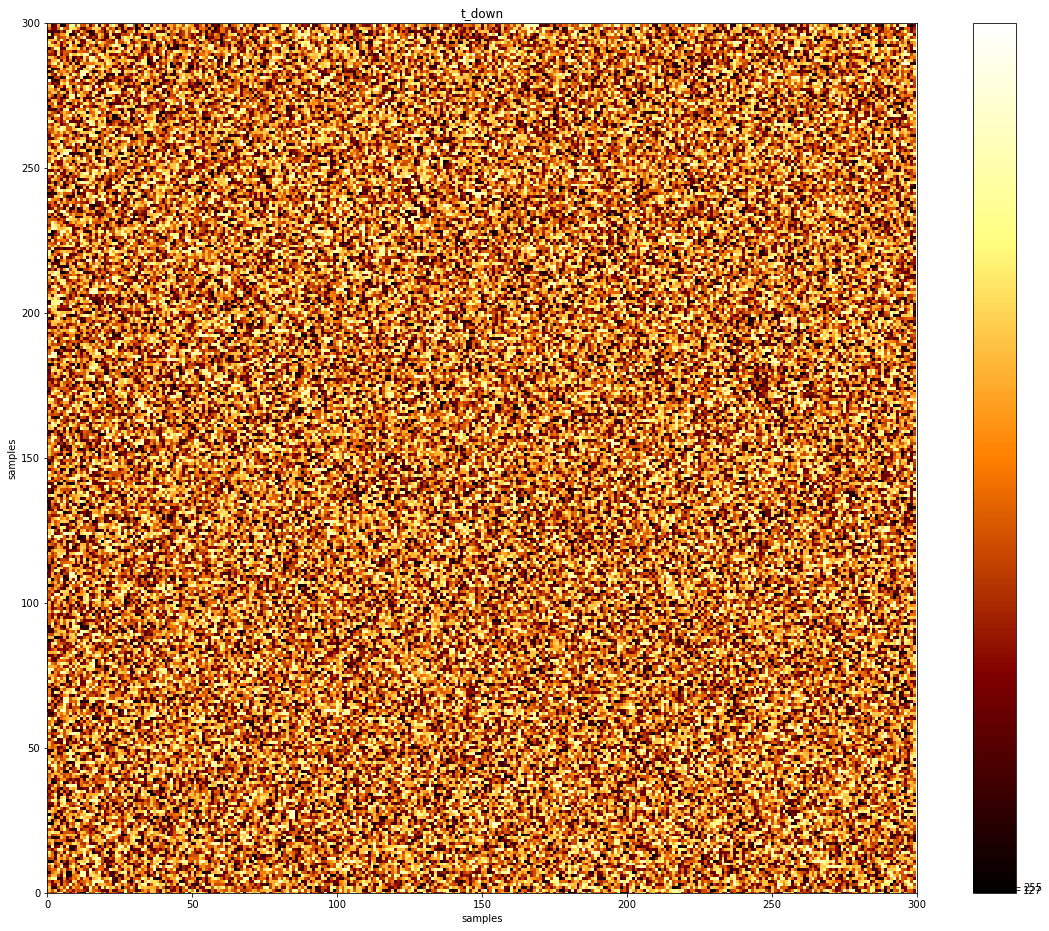

In [12]:
colourplot(down['t_down'], 300)

<AxesSubplot:>

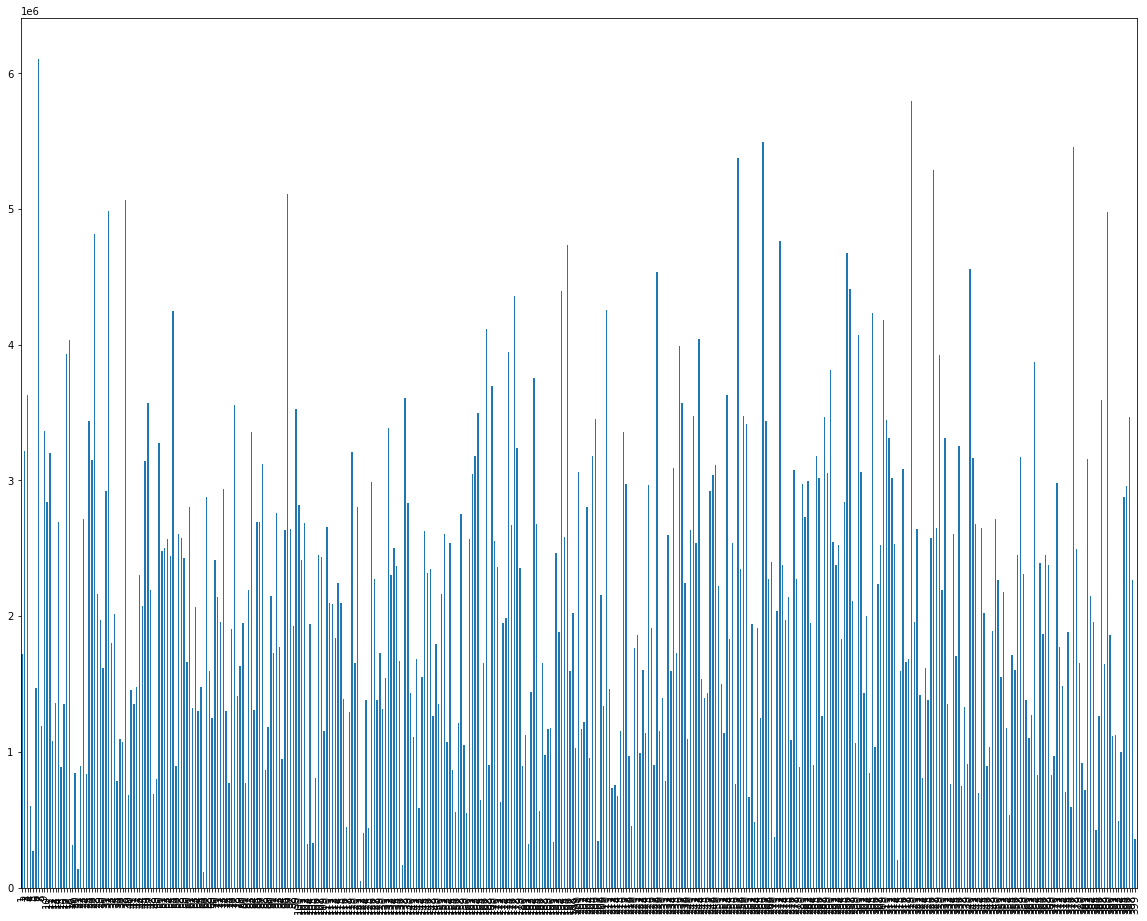

In [13]:
f = scipy.fft.fft(down['t_down'].values)
f = pd.Series(f)
f.abs()[1:400].plot(kind='bar')